# Convolutional neural networks

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # CPU

import cv2 as cv
#from tfcv import * # a helper library that contain some useful functions 

## Convolutional filters

Convolutional filters are small windows that run over each pixel of the image and compute weighted average of the neighboring pixels.

In [8]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

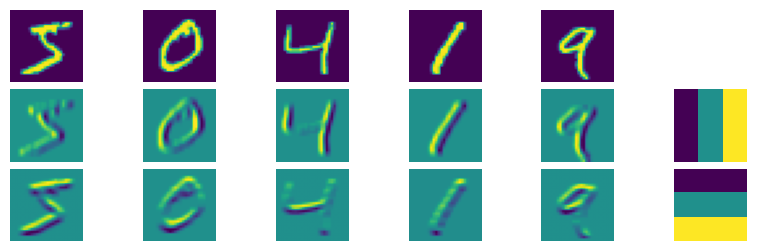

In [9]:
vertical_filter = np.array([[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]])
horizontal_filter = np.array([[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]])

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(10,3))
fig.subplots_adjust(hspace=0.1)

for img,ax in zip(x_train[:5,:,:],axs[0,:]):
    ax.imshow(img)
    ax.axis("off")
axs[0,-1].axis("off")

for img,ax in zip(x_train[:5,:,:],axs[1,:]):
    ax.imshow(cv.filter2D(img,-1,vertical_filter))
    ax.axis("off")
axs[1,-1].imshow(vertical_filter)
axs[1,-1].axis("off")

for img,ax in zip(x_train[:5,:,:],axs[2,:]):
    ax.imshow(cv.filter2D(img,-1,horizontal_filter))
    ax.axis("off")
axs[2,-1].imshow(horizontal_filter)
axs[2,-1].axis("off")

plt.show()

## Convolutional layers

Convolutional layers are defined using Conv2d class. We need to specify the following:
* <code>filters</code> - number of filters to use. We will use 9 different filters, which will give the network plenty of opportunities to explore which * filters work best for our scenario.
* <code>kernel_size</code> is the size of the sliding window. Usually 3x3 or 5x5 filters are used

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=9, 
                        kernel_size=(5,5), 
                        input_shape=(28,28,1),# the last is the channel : WxHxC
                        activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 9)         234       
                                                                 
 flatten_1 (Flatten)         (None, 5184)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                51850     
                                                                 
Total params: 52084 (203.45 KB)
Trainable params: 52084 (203.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
print(x_train.shape)
print(np.expand_dims(x_train,3).shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [14]:
x_train_c = np.expand_dims(x_train,3)
x_test_c = np.expand_dims(x_test,3)
hist = model.fit(x_train_c,y_train,
                 validation_data=(x_test_c,y_test),
                 epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0889 - acc: 0.9752 - val_loss: 0.0665 - val_acc: 0.9797
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0661 - acc: 0.9811 - val_loss: 0.0538 - val_acc: 0.9816
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0561 - acc: 0.9840 - val_loss: 0.0519 - val_acc: 0.9835


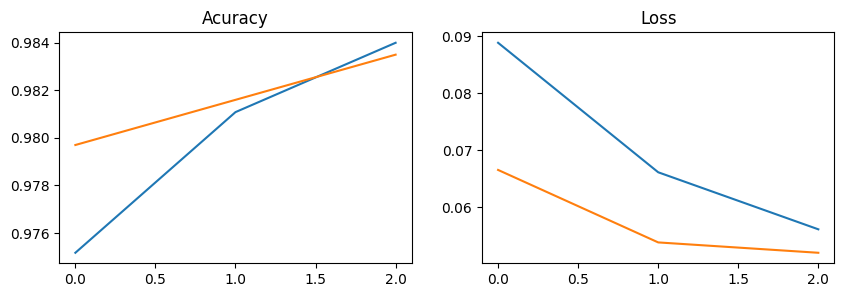

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

axs[0].plot(hist.history["acc"])
axs[0].plot(hist.history["val_acc"])
axs[0].set_title("Acuracy")

axs[1].plot(hist.history["loss"])
axs[1].plot(hist.history["val_loss"])
axs[1].set_title("Loss")

plt.show()

In [33]:
# l = model.layers[0].weights[0]
# l[...,0,i]

## Multi-layered CNNs and pooling layers

## Build model for CIFAR-10 dataset